### 交叉熵损失函数
单分类单输出用平方损失函数，多分类会有多输出如果也用平方损失函数的话，就构造[0,1,0...,0]只有类别那一项是1的向量，然后计算平方损失，不过预测分类结果正确，不需要预测概率完全等于标签概率，平方损失过于严格。交叉熵是一个常用的衡量方法。
$$H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ) = -\sum_{j=1}^q y_j^{(i)} \log \hat y_j^{(i)},$$
向量$\boldsymbol y^{(i)}$中只有第$y^{(i)}$个元素$y^{(i)}_{y^{(i)}}$为1，其余全为0，于是$H(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}) = -\log \hat y_{y^{(i)}}^{(i)}$。也就是说，交叉熵只关心对正确类别的预测概率，因为只要其值足够大，就可以确保分类结果正确。
假设训练数据集的样本数为$n$，交叉熵损失函数定义为
$$\ell(\boldsymbol{\Theta}) = \frac{1}{n} \sum_{i=1}^n H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ),$$

其中$\boldsymbol{\Theta}$代表模型参数。同样地，如果每个样本只有一个标签，那么交叉熵损失可以简写成$\ell(\boldsymbol{\Theta}) = -(1/n)  \sum_{i=1}^n \log \hat y_{y^{(i)}}^{(i)}$。从另一个角度来看，我们知道最小化$\ell(\boldsymbol{\Theta})$等价于最大化$\exp(-n\ell(\boldsymbol{\Theta}))=\prod_{i=1}^n \hat y_{y^{(i)}}^{(i)}$，即最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的联合预测概率。

In [18]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [31]:
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets',
               train=True,download=True,transform=torchvision.transforms.ToTensor()) #
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets',
               train=False,download=True,transform=torchvision.transforms.ToTensor())
print(type(mnist_train))
print(len(mnist_train))
#print(mnist_train[0])  #tuple (Tensor,int) 可以用[0]  [1]代表第一个和第二个值
print(mnist_train[0][0],mnist_train[0][1])
feature,label = mnist_train[0]
print(type(feature),type(label))
#print(feature.shape,label)
#print(feature.dtype)

Using downloaded and verified file: ./Datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ./Datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./Datasets/FashionMNIST/raw
Using downloaded and verified file: ./Datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./Datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./Datasets/FashionMNIST/raw
Using downloaded and verified file: ./Datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./Datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./Datasets/FashionMNIST/raw
Using downloaded and verified file: ./Datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./Datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./Datasets/FashionMNIST/raw
Processing...
Done!
<class 'torchvision.datasets.mnist.FashionMNIST'>
60000
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.

In [32]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]  #可以处理多个label

<class 'matplotlib.figure.Figure'> <class 'numpy.ndarray'>
(2, 5)
(10,)


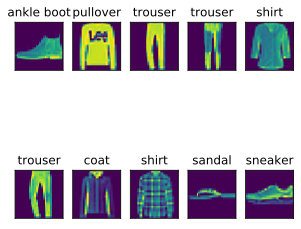

In [33]:
from IPython import display
def show_fashion_mnist(images,labels):
    display.set_matplotlib_formats('svg')
    fig,ax = plt.subplots(2,len(images)//2,figsize=(5,5))
    print(type(fig),type(ax))
    print(ax.shape)
    ax = ax.reshape(1,-1)[0,:]
    print(ax.shape)  #如果不是一行的话，要转换为dim=1的numpy list就可以了
    for f,img,lbl in zip(ax,images,labels):
        f.imshow(img.view(28,28).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
X,y =[],[]
for i in range(10):
    X.append(mnist_test[i][0])
    y.append(mnist_test[i][1])
show_fashion_mnist(X,get_fashion_mnist_labels(y))
    

### 数据读取
数据读取经常是训练的性能瓶颈，特别当模型教简单或者计算硬件性能较高时，pytorch的DataLoader中一个很方便的功能是允许使用多进程来加速数据读取。

In [73]:
import time
batch_size = 256
num_workers =8

train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=num_workers)
print(type(train_iter))

start = time.time()
for X,y in train_iter:
    continue
print('%.2f sec' %(time.time()-start)) 
#1-5.08s,2-2.66s,3-1,97s,4-1.63s, 8-1.25s 8最小 时间不稳定，不过1-8是下降的 8以上显示时间已经不下降了
#cpu信息在/proc/cpuinfo中有8个processor，2颗4核的cpu

<class 'torch.utils.data.dataloader.DataLoader'>
1.38 sec
